In [72]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Generate the dataset
np.random.seed(46)
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [74]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

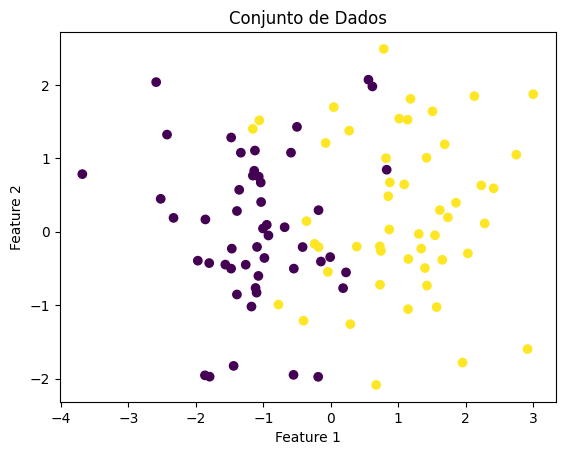

In [75]:
# Plotar o conjunto de dadosplt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de Dados')
plt.show()


In [76]:
# treinar o modelo Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

Perceptron()

In [77]:
# Imprimir os pesos e o viés
print(f"Pesos: {perceptron.coef_}")
print(f"Viés: {perceptron.intercept_}")

Pesos: [[ 2.39257278 -0.20771404]]
Viés: [0.]


In [78]:
# Avaliar o modelo
from sklearn.metrics import accuracy_score

y_pred = perceptron.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do Perceptron: {acc}")

Acurácia do Perceptron: 0.85


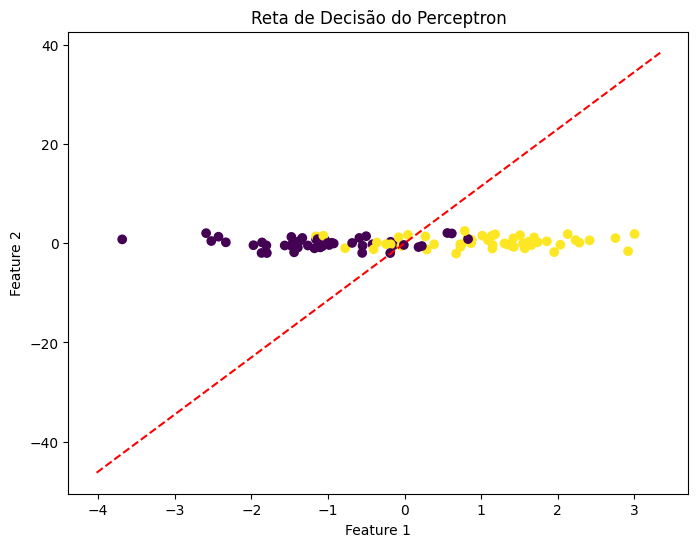

In [79]:
# Plotar a reta resultante
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')

# Obter os limites dos eixos
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Criar uma grade para plotar a reta
xx = np.linspace(x_min, x_max)
yy = -(perceptron.coef_[0][0] * xx + perceptron.intercept_) / perceptron.coef_[0][1]

plt.plot(xx, yy, color='red', linestyle='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Reta de Decisão do Perceptron')
plt.show()

In [80]:
# Criar e treinar o modelo MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5, 3, 1), max_iter=2000)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 3, 1), max_iter=2000)

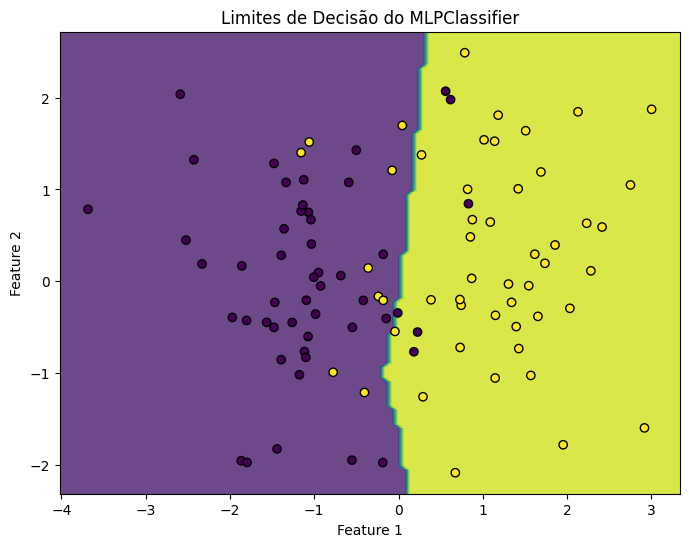

In [81]:
# Prever e plotar os limites de decisão
# Criar uma grade de pontos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Limites de Decisão do MLPClassifier')
plt.show()